# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 594


['cidreira',
 'badger',
 'piti village',
 'bereeda',
 'ushuaia',
 'grytviken',
 'howard springs',
 'rattvik',
 'yellowknife',
 'stanley',
 'udachny',
 'hawaiian paradise park',
 'kodiak',
 'rampur',
 'al kharijah',
 'blackmans bay',
 'bilibino',
 'keflavik',
 'waitangi',
 'port-aux-francais',
 'arraial do cabo',
 "cooper's town",
 'marcon-gaggio-colmello',
 'klyuchi',
 'la sarre',
 'utrik',
 'kailua-kona',
 'wailua homesteads',
 'fort st. john',
 'port lincoln',
 'grand baie',
 'dryden',
 'nova prata',
 'saint-philippe',
 'olonkinbyen',
 'fale old settlement',
 'mugia',
 'hamilton',
 'mahina',
 'papatowai',
 'laguna',
 'alofi',
 'margaret river',
 'brokopondo',
 'santa ana de yacuma',
 'iqaluit',
 'afaahiti',
 'west island',
 'alotau',
 'ribeira grande',
 'ta`u',
 'watton',
 'uturoa',
 'isafjordur',
 'chonchi',
 'sao vicente',
 'adamstown',
 'nasiriyah',
 'longyearbyen',
 'buzuluk',
 'nova sintra',
 'port elizabeth',
 'lompoc',
 'edinburgh of the seven seas',
 'fortuna',
 'nemuro',
 'g

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | piti village
Processing Record 4 of Set 1 | bereeda
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | howard springs
Processing Record 8 of Set 1 | rattvik
City not found. Skipping...
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | udachny
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | rampur
Processing Record 15 of Set 1 | al kharijah
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | keflavik
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 2

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.1811,-50.2056,20.54,63,97,2.91,BR,1692195098
1,badger,64.8000,-147.5333,14.28,83,75,0.00,US,1692195098
2,piti village,13.4626,144.6933,28.49,86,0,2.06,GU,1692195099
3,bereeda,11.8704,51.0579,33.09,49,16,0.66,SO,1692195100
4,ushuaia,-54.8000,-68.3000,-0.74,80,23,1.19,AR,1692195100


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/refle/Data_Bootcamp/Data_analytics_challenges/Starter_Code_API_challenge/output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/refle/Data_Bootcamp/Data_analytics_challenges/Starter_Code_API_challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,20.54,63,97,2.91,BR,1692195098
1,badger,64.8000,-147.5333,14.28,83,75,0.00,US,1692195098
2,piti village,13.4626,144.6933,28.49,86,0,2.06,GU,1692195099
3,bereeda,11.8704,51.0579,33.09,49,16,0.66,SO,1692195100
4,ushuaia,-54.8000,-68.3000,-0.74,80,23,1.19,AR,1692195100


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

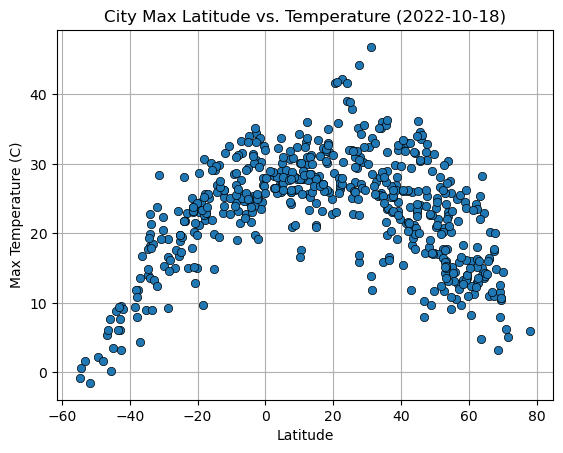

In [9]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/refle/Data_Bootcamp/Data_analytics_challenges/Starter_Code_API_challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

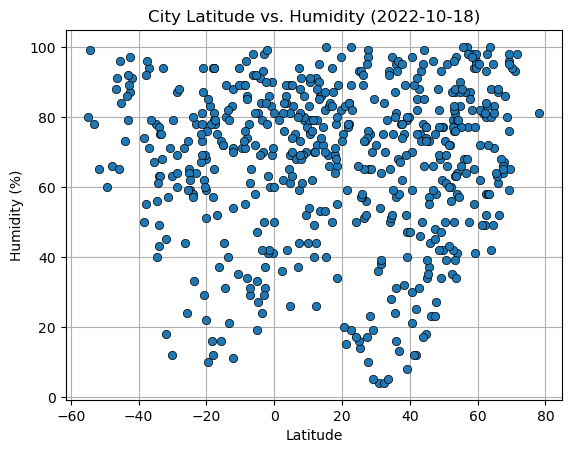

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/refle/Data_Bootcamp/Data_analytics_challenges/Starter_Code_API_challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

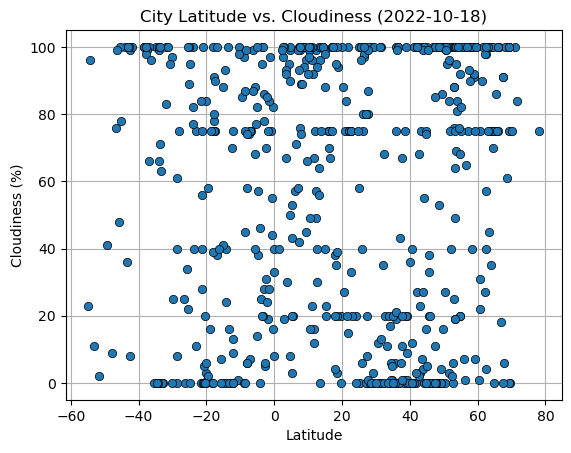

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/refle/Data_Bootcamp/Data_analytics_challenges/Starter_Code_API_challenge/output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

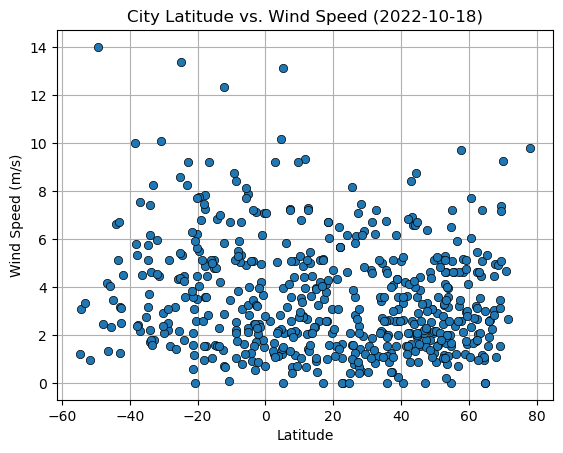

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/refle/Data_Bootcamp/Data_analytics_challenges/Starter_Code_API_challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, text_coordinates):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,badger,64.8000,-147.5333,14.28,83,75,0.00,US,1692195098
2,piti village,13.4626,144.6933,28.49,86,0,2.06,GU,1692195099
3,bereeda,11.8704,51.0579,33.09,49,16,0.66,SO,1692195100
7,yellowknife,62.4560,-114.3525,13.01,80,40,2.68,CA,1692195103
8,stanley,54.8680,-1.6985,20.16,77,20,1.54,GB,1692195103


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,20.54,63,97,2.91,BR,1692195098
4,ushuaia,-54.8000,-68.3000,-0.74,80,23,1.19,AR,1692195100
5,grytviken,-54.2811,-36.5092,0.62,99,96,3.10,GS,1692195101
6,howard springs,-12.4970,131.0470,22.95,83,70,1.38,AU,1692195101
14,blackmans bay,-43.0167,147.3167,6.07,79,100,3.16,AU,1692195107


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.38973882212732447


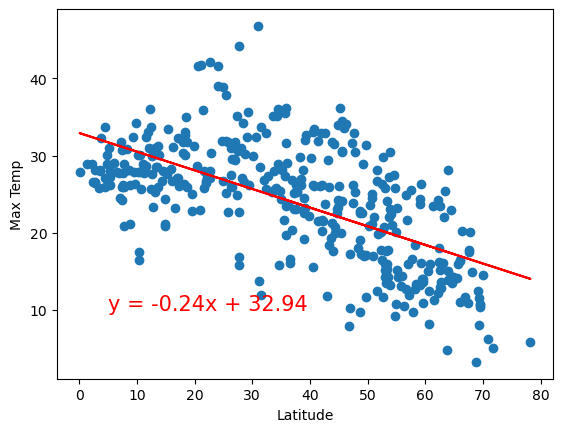

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, "Max temp", (5, 10))

The r-value is: 0.7230183923868349


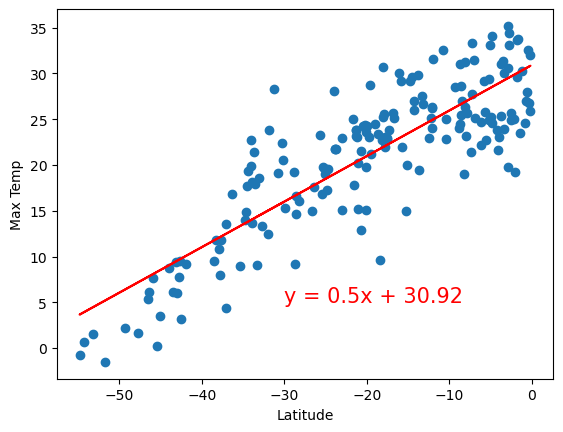

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, "Max temp", (-30, 5))

There seems to be a weak correlation between the temperature and the latitude in the northern hemisphere r ~ 0.3 while in the case in the southern hemisphere there is good correlation between temperature and latitude with r ~ 0.7.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002995106097815292


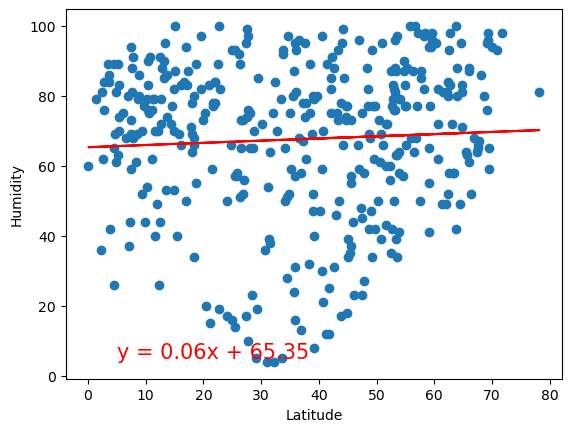

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, "Humidity", (5, 5))

The r-value is: 0.02104840773180069


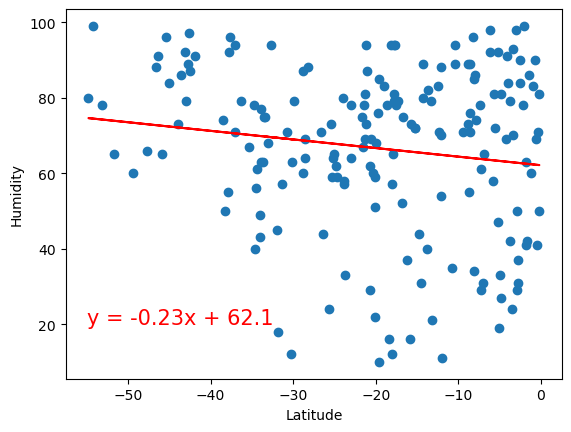

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regression(x_values, y_values, "Max temp", (-55, 20))

There does not seem to be a strong correlation between humidity and latitude in both hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 1.0924255929685584e-05


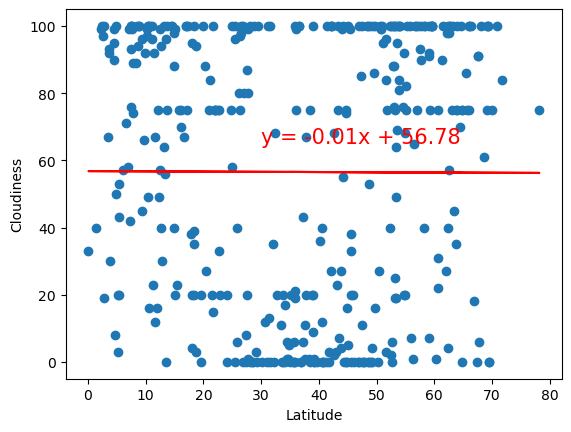

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, "Cloudiness", (30, 65))

The r-value is: 0.009622846075263692


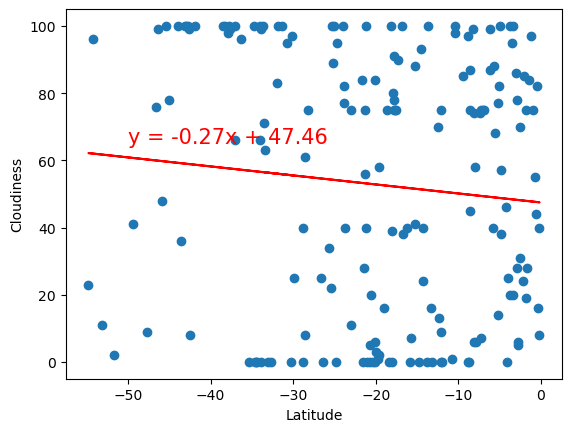

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, "Cloudiness", (-50, 65))

There seems to be a no strong correlation between the cloudiness and the latitude in the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0001248134777858007


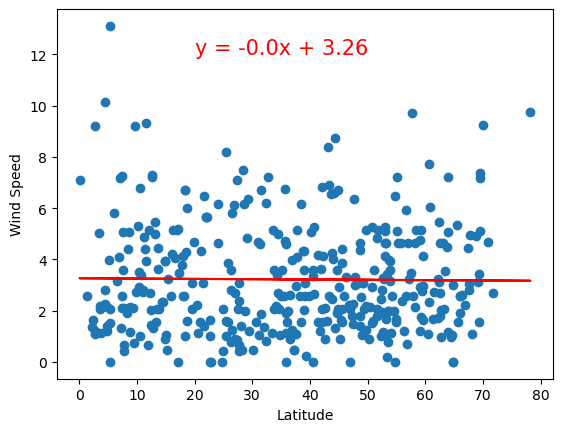

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, "Wind Speed", (20, 12))

The r-value is: 0.005044698218237071


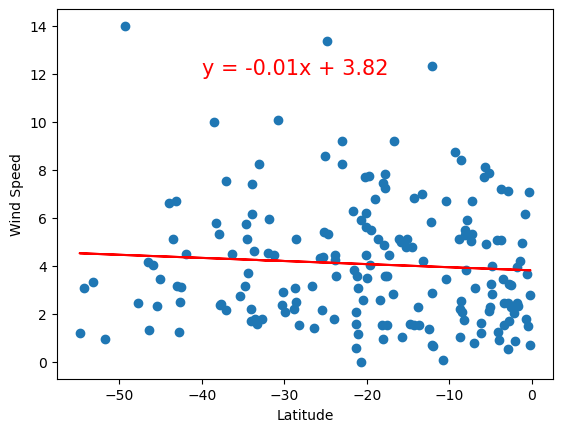

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, "Wind Speed", (-40, 12))

In [ ]:
There seems to be no correlation between the wind speed and the latitude in the northern and southern hemispheres looking at the low r-values.